# 插值问题

插值问题就是已知n个点$(x_i,y_i)$,其中$x_i$两两不相等，然后求任意插值点$x$对应的$y$值。
求解的基本思路是构造一个`插值函数`，使得这个函数在已知的n个点上的函数值与已知的n个点的函数值相等。

## 拉格朗日多项式插值

### 代码实现
```python

    def lagrange(x, y, z):
    n = len(x)
    res = 0
    for i in range(n):
        t = 1
        for j in range(n):
            if j != i:
                t *= (z - x[j]) / (x[i] - x[j])
        res += y[i] * t
    return res

```
### 算法

拉格朗日多项式插值是一种基于拉格朗日插值多项式的插值方法。拉格朗日插值多项式的定义如下：
$$
L_n(x)=a_nx^n+a_{n-1}x^{n-1}+\dots+a_1x+a_0
$$
对于结点$(x_i,y_i)$应有
$$
L_n(x_i)=y_i, i=0,1,\dots,n
$$
为了确定拉格朗日插值多项式的系数$a_i$，我们可以通过构造一个线性方程组来求解。具体的构造方法是，首先构造一个关于$a_i$的线性方程组，然后求解这个线性方程组，得到拉格朗日插值多项式的系数。
记
$$
X=\begin{bmatrix}
1 & x_0 & x_0^2 & \dots & x_0^n \\
1 & x_1 & x_1^2 & \dots & x_1^n \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \dots & x_n^n \\
\end{bmatrix}
$$
$$
a=(a_0,a_1,\dots,a_n)^T
$$
$$
Y=(y_0,y_1,\dots,y_n)^T
$$
则有
$$
Xa=Y
$$
实际上X的行列式为一个Van der Monde行列式
$$
det(X)=\prod_{0\leq i<j\leq n}(x_j-x_i)
$$
由于$x_i$两两不相等，所以$det(X)\neq 0$，所以X是可逆的，所以可以求解$a$。即可以通过n+1个节点的n次多项式曲线可以唯一确定。
实际上比较方便的做法不是通过解线性方程组来求a,而是先构造一组基函数
$$
l_i(x)=\prod_{j=0,j\neq i}^n\frac{x-x_j}{x_i-x_j}, i=0,1,\dots,n
$$
容易看出
$$
l_i(x_j)=\delta_{ij}
$$
所以拉格朗日插值多项式可以表示为
$$
L_n(x)=\sum_{i=0}^ny_il_i(x)
$$
这样就可以通过基函数$l_i(x)$来求解拉格朗日插值多项式的系数了。

### 误差估计

定性地讲，拉格朗日插值多项式的误差是随着插值点的增加而减小的。具体地，我们有以下性质：
- 插值点增加，误差减小
- 原函数的光滑程度越高，误差越小
- 插值点越接近产生节点，误差越小

### 插值多项式的震荡

拉格朗日插值多项式的一个缺点是，它在插值点附近可能会出现震荡。这是因为拉格朗日插值多项式的系数是通过插值点的函数值来确定的，而插值点的函数值可能会有很大的波动。这种震荡现象在实际应用中是不希望出现的。一个例子是Runge现象，即在等距节点上进行插值时，插值多项式在两端可能会出现震荡。下面的代码展示了这个现象。可以看到，只有在|x|较小时，插值多项式的误差才会比较小。


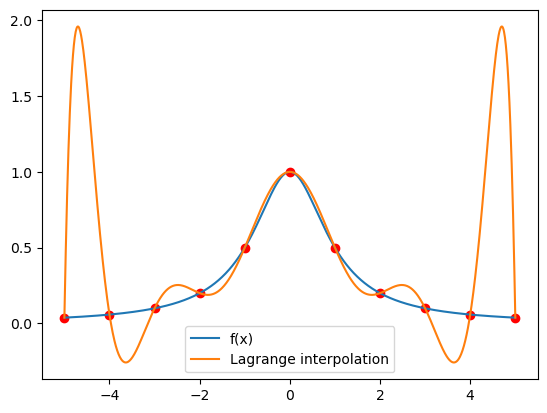

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Runge function
f = lambda x: 1 / (1 + x**2)

# Lagrange interpolation
def lagrange(x, y, z):
    n = len(x)
    res = 0
    for i in range(n):
        t = 1
        for j in range(n):
            if j != i:
                t *= (z - x[j]) / (x[i] - x[j])
        res += y[i] * t
    return res


# Interpolation points
n = 11
x = np.linspace(-5, 5, n)
y = f(x)

# Interpolation
z = np.linspace(-5, 5, 1000)
w = lagrange(x, y, z) # notice that this is a vectorized function (broadcasting to all z)

# Plot
plt.plot(z, f(z), label="f(x)")
plt.plot(z, w, label="Lagrange interpolation")
plt.scatter(x, y, color="red")
plt.legend()
plt.show()

## 分段线性插值

### 代码实现
```python
def piecewise_linear(x, y, z):
    n = len(x)
    for i in range(n-1):
        if x[i] <= z <= x[i+1]:
            return y[i] + (y[i+1] - y[i]) / (x[i+1] - x[i]) * (z - x[i])
    raise ValueError("z is out of range")
```
### 算法
简单地说，将每两个相邻的节点用直线连起来，如此形成的一条折线就是分段线性插值函数，记作$I_n(x)$。
$$
I_n(x)=\begin{cases}
y_0+\frac{y_1-y_0}{x_1-x_0}(x-x_0), & x_0\leq x\leq x_1 \\
y_1+\frac{y_2-y_1}{x_2-x_1}(x-x_1), & x_1\leq x\leq x_2 \\
\vdots \\
y_{n-1}+\frac{y_n-y_{n-1}}{x_n-x_{n-1}}(x-x_{n-1}), & x_{n-1}\leq x\leq x_n \\
\end{cases}
$$
实际上，用$I_n(x)$计算x点的插值时，只用到x左右的两个节点，计算量与n无关，所以分段线性插值的计算量是常数级别的。这是分段线性插值的一个优点。
而且它的收敛性较好

### 例子
下面的代码展示了分段线性插值的一个例子。

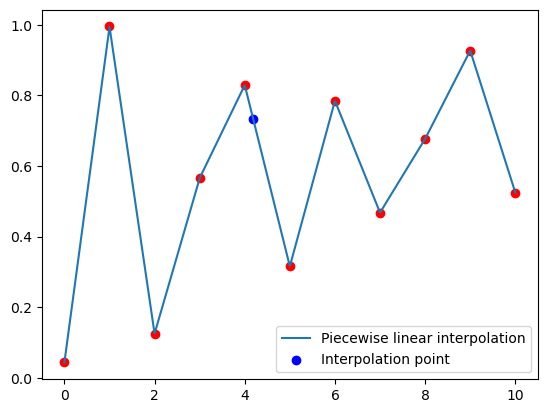

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

def piecewise_linear(x, y, z):
    n = len(x)
    for i in range(n - 1):
        if x[i] <= z <= x[i + 1]:
            return y[i] + (y[i + 1] - y[i]) / (x[i + 1] - x[i]) * (z - x[i])
    raise ValueError("z is out of range")

x = np.linspace(0, 10, 11)
y = np.array([random.random() for _ in range(11)])

z = np.linspace(0, 10, 1000)
w = np.array([piecewise_linear(x, y, z) for z in z])

x_=random.random() * 10
y_=piecewise_linear(x, y, x_)

plt.plot(z, w, label="Piecewise linear interpolation")
plt.scatter(x, y, color="red")
plt.scatter(x_, y_, color="blue", label="Interpolation point")

plt.legend()
plt.show()

## 三次样条插值

分段线性函数的缺点是它们在连接点处不光滑。三次样条插值通过在每个子区间上使用三次多项式来克服这个问题。这些多项式是这样的，它们在连接点处不仅值相等，而且一阶导数和二阶导数也相等。这样，我们可以得到一个光滑的曲线。

### 三次样条函数
三次样条函数记作$S(x)$，它是一个三次多项式的集合，每个子区间上都有一个三次多项式。记$S_i(x)$为第i个子区间上的三次多项式，$[x_i,x_{i+1}]$为第i个子区间。则有  
1. 在每个子区间上，$S_i(x)$是一个三次多项式
2. $S_i(x_i)=y_i, S_i(x_{i+1})=y_{i+1}, i=0,1,\dots,n-1$
3. $S_i(x_{i+1})=S_{i+1}(x_{i+1}), i=0,1,\dots,n-2$
4. $S_i'(x_{i+1})=S_{i+1}'(x_{i+1}), i=0,1,\dots,n-2$
5. $S_i''(x_{i+1})=S_{i+1}''(x_{i+1}), i=0,1,\dots,n-2$
上面式子一共给出了$4n-2$个方程，而$S(x)$一共有$4n$个系数，所以还需要两个方程来确定$S(x)$。一般地，我们可以通过以下三种方法来确定$S(x)$
1. 自然边界条件：$S''(x_0)=S''(x_n)=0$
2. 固定边界条件：$S'(x_0)=f'(x_0), S'(x_n)=f'(x_n)$
3. 周期边界条件：$S'(x_0)=S'(x_n), S''(x_0)=S''(x_n)$仅当是周期函数时才使用，i.e. $f(x_0)=f(x_n)$

### 代码实现
```python
import numpy as np
from scipy.interpolate import CubicSpline
def cubic_spline(x, y, z):
    cs = CubicSpline(x, y)
    return cs(z)
```

bc_type : string or 2-tuple, optional
    If bc_type is a string, then the specified condition will be applied at both ends of a spline. Available conditions are:

- 'not-a-knot' (default): The first and second segment at a curve end are the same polynomial. It is a good default when there is no information on boundary conditions.
- 'periodic': The interpolated functions is assumed to be periodic of period x[-1] - x[0]. The first and last value of y must be identical: y[0] == y[-1]. This boundary condition will result in y'[0] == y'[-1] and y''[0] == y''[-1].
- 'clamped': The first derivative at curves ends are zero. Assuming a 1D y, bc_type=((1, 0.0), (1, 0.0)) is the same condition.
- 'natural': The second derivative at curve ends are zero. Assuming a 1D y, bc_type=((2, 0.0), (2, 0.0)) is the same condition.
If bc_type is a 2-tuple, the first and the second value will be applied at the curve start and end respectively. The tuple values can be one of the previously mentioned strings (except 'periodic') or a tuple (order, deriv_values) allowing to specify arbitrary derivatives at curve ends:
    
### 例子
下面的代码展示了三次样条插值的一个例子。

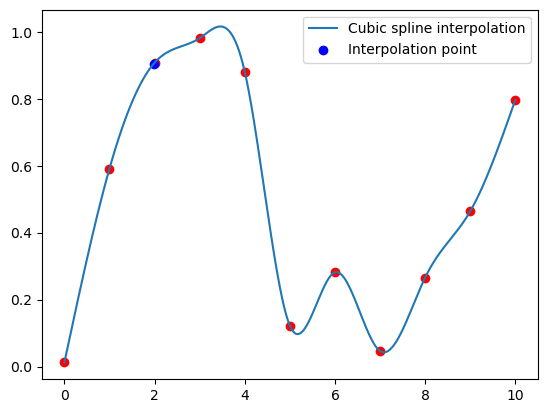

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.interpolate import CubicSpline

def cubic_spline(x, y, z):
    cs = CubicSpline(x, y,bc_type="natural") # bc_type=[“not-a-knot”, “clamped”, “natural”, “periodic”]
    return cs(z)

x = np.linspace(0, 10, 11)
y = np.array([random.random() for _ in range(11)])

z = np.linspace(0, 10, 1000)
w = cubic_spline(x, y, z)

x_=random.random() * 10
y_=cubic_spline(x, y, x_)

plt.plot(z, w, label="Cubic spline interpolation")
plt.scatter(x, y, color="red")
plt.scatter(x_, y_, color="blue", label="Interpolation point")
plt.legend()
plt.show()


# 数值积分

用数值方法近似地求一个函数f(x)在区间[a,b]上的积分。数值积分的基本思路是将区间[a,b]划分成n个小区间，然后在每个小区间上用一个多项式来近似f(x)，然后对这些多项式的积分求和。这样就得到了f(x)在区间[a,b]上的积分的近似值。定义如下
$$
I(f)=\int_a^bf(x)dx=\lim_{n\to\infty}\sum_{i=1}^nf(x_i)\Delta x
$$
实际上就是要找到一个阶梯函数来代替f(x)。这个阶梯函数的面积和f(x)的面积尽量接近。

## 梯形公式和辛普森公式

本质上是Newton-Cotes公式的特例。可以写成统一的形式
$$
I(f)=\int_a^bf(x)dx\approx\sum_{i=1}^nw_if(x_i)
$$
其中$w_i$是权重，$x_i$是节点。它们本质上是将积分区间等分，将分点作为节点，用分段插值得到权重函数$w_i$。因此节点数n给定后，节点是固定的。

### 代码实现
直接从scipy库中调用即可，注意第一个参数是y值，第二个参数是x值，而且x值并不要求等间距。

```python
from scipy.integrate import trapz, simps
import numpy as np

f = lambda x: x**2

x = np.linspace(0, 1, 100)
y = f(x)

print(trapz(y, x))
print(simps(y, x))
```

梯形公式就是用一个梯形来近似f(x)在区间[a,b]上的积分。具体地，将区间[a,b]划分成n个小区间，然后在每个小区间上用一个线性函数来近似f(x)，然后对这些线性函数的积分求和。这样就得到了f(x)在区间[a,b]上的积分的近似值。定义如下

$$
T(f)\approx\frac{b-a}{2n}\left[f(x_0)+2f(x_1)+2f(x_2)+\dots+2f(x_{n-1})+f(x_n)\right]\\
T(f)=h\sum_{k=1}^{n-1}f_k+\frac{h}{2}(f_0+f_n),h=\frac{b-a}{n}
$$
梯形求积公式是在等距分割为h的情况下推导出来的，但是在实际数据中可能出现非等距区间分割的情况，这时候有新的公式，见课本p55。  

辛普森公式是用一个抛物线来近似f(x)在区间[a,b]上的积分。具体地，将区间[a,b]划分成n个小区间，然后在每两个相邻的小区间上用一个二次多项式来近似f(x)，然后对这些二次多项式的积分求和。这样就得到了f(x)在区间[a,b]上的积分的近似值。定义如下  
$$
S(f)\approx\frac{b-a}{3n}\left[f(x_0)+4f(x_1)+2f(x_2)+4f(x_3)+\dots+2f(x_{n-2})+4f(x_{n-1})+f(x_n)\right]
$$

> 注意这里是n而不是课本上的m。（n=2m）辛普森要求节点数是偶数，所以n是偶数。

梯形公式是二阶收敛的，而辛普森公式是四阶收敛的。这意味着，如果我们将区间[a,b]划分成n个小区间，然后将n增加到2n，那么梯形公式的误差会减小到原来的1/4，而辛普森公式的误差会减小到原来的1/16。但是，rouge现象依然存在，即在节点上进行插值时，插值多项式在两端可能会出现震荡。

## 高斯求积公式





In [4]:
from scipy.integrate import trapezoid, simpson
import numpy as np

# Function to integrate

half_circle = lambda x: (1 - x**2)**0.5

x = np.linspace(-1, 1, 100)
y = 2*half_circle(x)

print("梯形法则：", trapezoid(y, x))
print("辛普森法则：", simpson(y, x))

梯形法则： 3.1382180392018095
辛普森法则： 3.1399640917453775


## 高斯求积公式

Newton-Cotes方法中节点固定，不同的公式仅在于系数$w_i$的不同。而高斯求积公式中，节点和系数都是通过求解线性方程组得到的。

### 代数精度
用幂函数作为被积函数f，以近似积分与精确值是否相等作为精度的度量指标，有如下定义\\
设$f(x)=x^k$,用$I(f)=\sum_{i=1}^nw_if(x_i)$来近似积分，若对于任意$k=0,1,\dots,m$，有$I(f)=\int_a^bf(x)dx$，则称$I(f)$具有代数精度m。\\
- 梯形公式和辛普森公式具有代数精度1和3

### 高斯公式

高斯公式的基本思路是，将区间[a,b]上的积分转化为区间[-1,1]上的积分，然后用一个多项式来近似f(x)，然后对这个多项式的积分求和。具体地，设$x_i$是区间[-1,1]上的n个节点，$w_i$是对应的权重，那么有
$$
I(f)=\int_a^bf(x)dx=\int_{-1}^1f\left(\frac{b-a}{2}x+\frac{a+b}{2}\right)\frac{b-a}{2}dx\approx\sum_{i=1}^nw_if(x_i)
$$
高斯公式的节点和权重是通过求解线性方程组得到的。具体地，设$w_i$是权重，$x_i$是节点，那么有
$$
\int_{-1}^1x^kdx=\sum_{i=1}^nw_ix_i^k, k=0,1,\dots,2n-1
$$
这是一个线性方程组，可以通过求解这个线性方程组来得到节点和权重。高斯公式的一个优点是，它的代数精度很高。具体地，高斯公式的代数精度是2n-1。这意味着，如果我们用一个n次多项式来近似f(x)，那么高斯公式的误差会是$O(h^{2n})$。这是一个非常高的精度。高斯公式的一个缺点是，它的节点和权重是通过求解线性方程组得到的，这意味着计算量很大。另外，高斯公式的节点是固定的，这意味着它不能很好地处理f(x)在区间[a,b]上的波动。

### Gauss-Lobatto公式
Gauss-Lobatto的思想是把积分区间分小，然后在每个小区间上用一个多项式来近似f(x)，然后对这些多项式的积分求和。这样就得到了f(x)在区间[a,b]上的积分的近似值。定义如下
$$
I(f)=w_0f(x_0)+\sum_{k=2}^{n=1}w_kf(x_k)+w_nf(x_n)
$$
其中$w_i$是权重，$x_i$是节点。它们本质上是将积分区间等分，将分点作为节点，用分段插值得到权重函数$w_i$。因此节点数n给定后，节点是固定的。
> 代数精度为2n-3

## 自适应求积方法
自适应选步长，在变化剧烈的地方精细一点。
